In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
import numpy as np


In [2]:
raw_df = pd.read_csv("/Users/benmurphy/Data/rugby_data/match_data/all_matches.csv")
raw_df

,match_date_,Home team,Away team,home_n_tries,minutes_of_home_tries,away_n_tries,minutes_of_away_tries,home_n_pen_kicks,minutes_of_home_pen_kicks,away_n_pen_kicks,...,pkey,home_score,away_score,score_diff,home_pack_weight,away_pack_weight,home_forwards_ages,home_backs_ages,away_forwards_ages,away_backs_ages
0,2022-09-03,RACING 92,CASTRES,3.0,33_26_77,1.0,56,2.0,3_66,4.0,...,RACING 92_CASTRES_2022-09-03,25,19,6,889,912,26,25,26,27
1,2022-09-03,BRIVE,LYON,3.0,7_58_80,4.0,52_65_21_34,2.0,32_37,1.0,...,BRIVE_LYON_2022-09-03,27,31,-4,943,949,27,26,27,26
2,2022-09-03,TOULON,BAYONNE,5.0,48_61_17_63_54,3.0,35_43_3,3.0,11_15_22,1.0,...,TOULON_BAYONNE_2022-09-03,40,25,15,947,922,29,27,28,26
3,2022-09-03,PAU,PERPIGNAN,1.0,74,2.0,48_53,3.0,28_53_79,0.0,...,PAU_PERPIGNAN_2022-09-03,16,14,2,923,911,27,26,32,28
4,2022-09-03,PARIS,CLERMONT,2.0,44_27,2.0,56_62,4.0,2_50_72_77,2.0,...,PARIS_CLERMONT_2022-09-03,24,18,6,912,923,27,26,27,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,2025-06-07,MONTPELLIER,CLERMONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,MONTPELLIER_CLERMONT_2025-06-07,-1,-1,0,-1,-1,-1,-1,-1,-1
1296,2025-06-07,LYON,RACING 92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LYON_RACING 92_2025-06-07,-1,-1,0,-1,-1,-1,-1,-1,-1
1297,2025-06-07,BAYONNE,TOULON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BAYONNE_TOULON_2025-06-07,-1,-1,0,-1,-1,-1,-1,-1,-1
1298,2025-06-07,BORDEAUX,VANNES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BORDEAUX_VANNES_2025-06-07,-1,-1,0,-1,-1,-1,-1,-1,-1


In [3]:
raw_df.dtypes

match_date_                     object
Home team                       object
Away team                       object
home_n_tries                   float64
minutes_of_home_tries           object
away_n_tries                   float64
minutes_of_away_tries           object
home_n_pen_kicks               float64
minutes_of_home_pen_kicks       object
away_n_pen_kicks               float64
minutes_of_away_pen_kicks       object
home_n_conversions             float64
minutes_of_home_conversions     object
away_n_conversions             float64
minutes_of_away_conversions     object
pen_try_minutes_home            object
pen_try_minutes_away            object
competition                     object
round_stage                     object
pkey                            object
home_score                       int64
away_score                       int64
score_diff                       int64
home_pack_weight                 int64
away_pack_weight                 int64
home_forwards_ages       

In [4]:
matches = raw_df[['match_date_', 'competition', 'Home team', 'Away team', 'home_n_tries', 'away_n_tries', 'pkey']].copy()

matches['Total Tries'] = matches['home_n_tries'] + matches['away_n_tries']

matches.sort_values(by='match_date_')

,match_date_,competition,Home team,Away team,home_n_tries,away_n_tries,pkey,Total Tries
0,2022-09-03,top-14,RACING 92,CASTRES,3.0,1.0,RACING 92_CASTRES_2022-09-03,4.0
1,2022-09-03,top-14,BRIVE,LYON,3.0,4.0,BRIVE_LYON_2022-09-03,7.0
2,2022-09-03,top-14,TOULON,BAYONNE,5.0,3.0,TOULON_BAYONNE_2022-09-03,8.0
3,2022-09-03,top-14,PAU,PERPIGNAN,1.0,2.0,PAU_PERPIGNAN_2022-09-03,3.0
4,2022-09-03,top-14,PARIS,CLERMONT,2.0,2.0,PARIS_CLERMONT_2022-09-03,4.0
...,...,...,...,...,...,...,...,...
1298,2025-06-07,top-14,BORDEAUX,VANNES,NaN,NaN,BORDEAUX_VANNES_2025-06-07,NaN
1294,2025-06-07,top-14,PAU,LA ROCHELLE,NaN,NaN,PAU_LA ROCHELLE_2025-06-07,NaN
1293,2025-06-07,top-14,PERPIGNAN,TOULOUSE,NaN,NaN,PERPIGNAN_TOULOUSE_2025-06-07,NaN
1295,2025-06-07,top-14,MONTPELLIER,CLERMONT,NaN,NaN,MONTPELLIER_CLERMONT_2025-06-07,NaN


In [5]:
# create a season column
mask_24_25 = (matches['match_date_'] > '2024-07-31') & (matches['match_date_'] <= '2025-07-11')
mask_23_24 = (matches['match_date_'] > '2023-07-31') & (matches['match_date_'] <= '2024-07-11')
mask_22_23 = (matches['match_date_'] > '2022-07-31') & (matches['match_date_'] <= '2023-07-11')
mask_21_22 = (matches['match_date_'] > '2021-07-31') & (matches['match_date_'] <= '2022-07-11')

matches.loc[mask_24_25, "Season"] = "24/25 (5 rounds)"
matches.loc[mask_23_24, "Season"] = "23/24"
matches.loc[mask_22_23, "Season"] = "22/23"
matches.loc[mask_21_22, "Season"] = "21/22"

matches

,match_date_,competition,Home team,Away team,home_n_tries,away_n_tries,pkey,Total Tries,Season
0,2022-09-03,top-14,RACING 92,CASTRES,3.0,1.0,RACING 92_CASTRES_2022-09-03,4.0,22/23
1,2022-09-03,top-14,BRIVE,LYON,3.0,4.0,BRIVE_LYON_2022-09-03,7.0,22/23
2,2022-09-03,top-14,TOULON,BAYONNE,5.0,3.0,TOULON_BAYONNE_2022-09-03,8.0,22/23
3,2022-09-03,top-14,PAU,PERPIGNAN,1.0,2.0,PAU_PERPIGNAN_2022-09-03,3.0,22/23
4,2022-09-03,top-14,PARIS,CLERMONT,2.0,2.0,PARIS_CLERMONT_2022-09-03,4.0,22/23
...,...,...,...,...,...,...,...,...,...
1295,2025-06-07,top-14,MONTPELLIER,CLERMONT,NaN,NaN,MONTPELLIER_CLERMONT_2025-06-07,NaN,24/25 (5 rounds)
1296,2025-06-07,top-14,LYON,RACING 92,NaN,NaN,LYON_RACING 92_2025-06-07,NaN,24/25 (5 rounds)
1297,2025-06-07,top-14,BAYONNE,TOULON,NaN,NaN,BAYONNE_TOULON_2025-06-07,NaN,24/25 (5 rounds)
1298,2025-06-07,top-14,BORDEAUX,VANNES,NaN,NaN,BORDEAUX_VANNES_2025-06-07,NaN,24/25 (5 rounds)


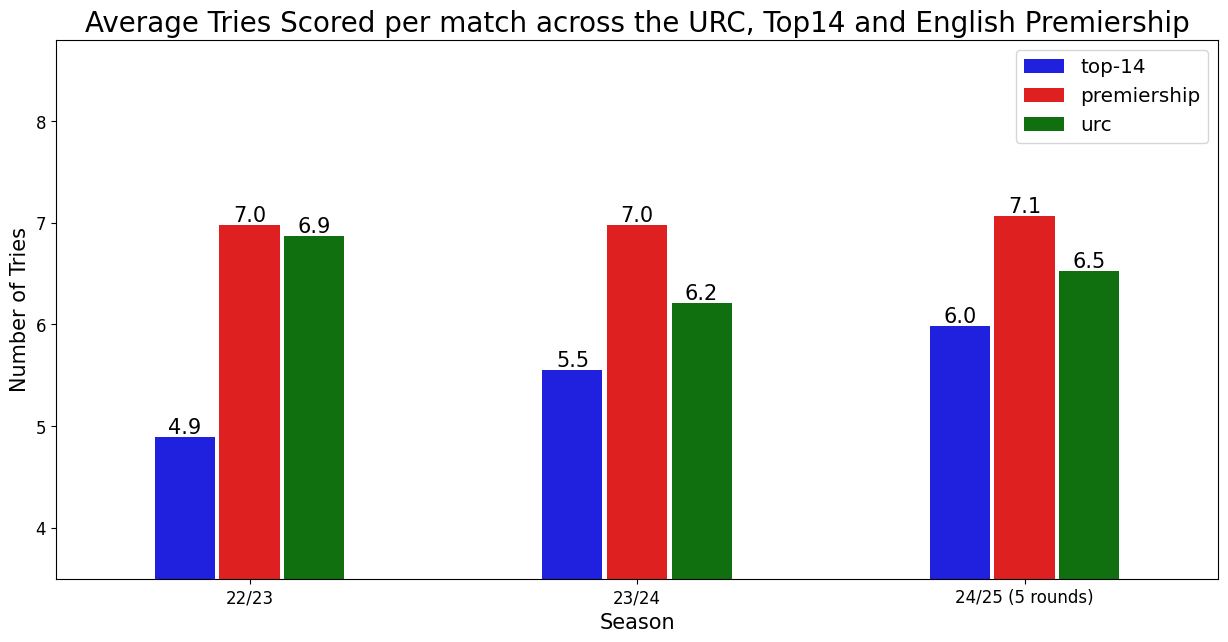

In [19]:
# create a subplot with 2 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))
# plt.grid(True)
sns.barplot(x="Season", y="Total Tries", hue='competition',
            data=matches, 
            errorbar=None, 
            fill=True,
            gap=0.07,
           width=0.5,
           palette=['b', 'r', 'g'])

bars_0 = ax.containers[0]
ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

bars_1 = ax.containers[1]
ax.bar_label(bars_1, labels=[f'{value:.1f}' for value in bars_1.datavalues], fontsize=15)

bars_2 = ax.containers[2]
ax.bar_label(bars_2, labels=[f'{value:.1f}' for value in bars_2.datavalues], fontsize=15)


plt.ylim(3.5, 8.8)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Average Tries Scored per match across the URC, Top14 and English Premiership",fontsize=20)
ax.set_xlabel("Season",fontsize=15)
ax.set_ylabel("Number of Tries",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12);
ax.xaxis.set_tick_params(labelsize = 12);

plt.legend(fontsize='x-large')

plt.show()

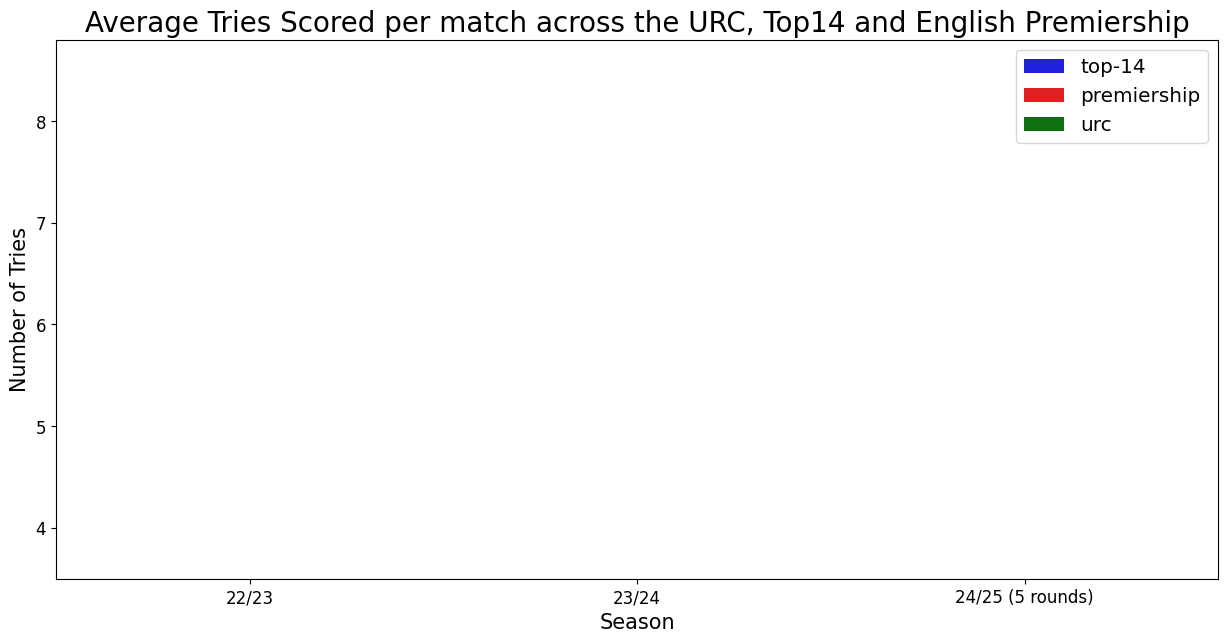

In [22]:
# create a subplot with 2 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))
# plt.grid(True)
sns.barplot(x="Season", y="away_n_tries", hue='competition',
            data=matches, 
            errorbar=None, 
            fill=True,
            gap=0.07,
           width=0.5,
           palette=['b', 'r', 'g'])

bars_0 = ax.containers[0]
ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

bars_1 = ax.containers[1]
ax.bar_label(bars_1, labels=[f'{value:.1f}' for value in bars_1.datavalues], fontsize=15)

bars_2 = ax.containers[2]
ax.bar_label(bars_2, labels=[f'{value:.1f}' for value in bars_2.datavalues], fontsize=15)


plt.ylim(3.5, 8.8)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Average Tries Scored per match across the URC, Top14 and English Premiership",fontsize=20)
ax.set_xlabel("Season",fontsize=15)
ax.set_ylabel("Number of Tries",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12);
ax.xaxis.set_tick_params(labelsize = 12);

plt.legend(fontsize='x-large')

plt.show()